# Image Processing with DNN

In [39]:
import tensorflow as tf

In [40]:
from tensorflow import keras

In [41]:
mnist=keras.datasets.mnist

In [42]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [43]:
train_images.shape

(60000, 28, 28)

In [44]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [45]:
from matplotlib import pyplot as plt

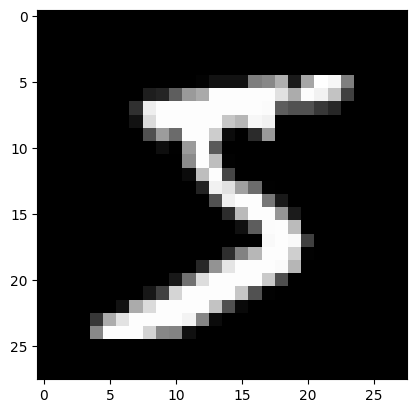

In [46]:
plt.imshow(train_images[0],cmap="gray");

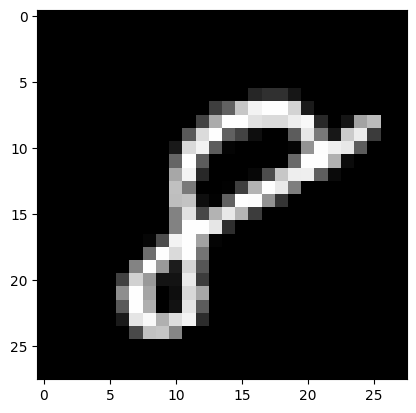

In [47]:
plt.imshow(train_images[59999],cmap="gray");

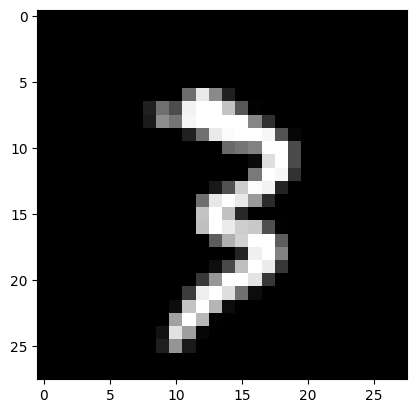

In [48]:
plt.imshow(train_images[25000],cmap="gray");

In [49]:
# Normalizing the data

In [50]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [51]:
# Since max val is 255, normalize with 255
train_images=train_images/255.0
test_images=test_images/255.0

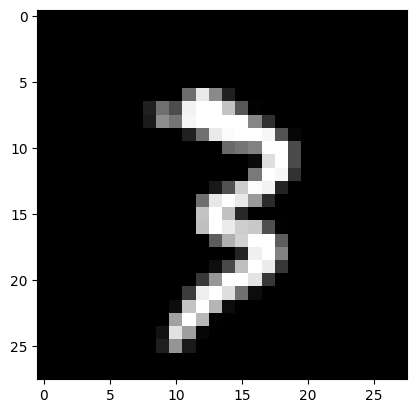

In [52]:
plt.imshow(train_images[25000],cmap="gray");

In [53]:
# no change after normalizing

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,InputLayer,Reshape
import tensorflow as tf

In [55]:
# CNN 

model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))  # Input layer
model.add(Reshape(target_shape=(28, 28, 1)))  # Grayscale channel (1)
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation="relu"))  # CNN layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer
model.add(Flatten())  # Flatten to 1D
model.add(Dense(10))  # Fully connected layer
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"]  # Correctly wrap "accuracy" in a list
)

In [56]:
history=model.fit(train_images,train_labels,batch_size=128,epochs=10,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8028 - loss: 0.7761 - val_accuracy: 0.9378 - val_loss: 0.2188
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9411 - loss: 0.2069 - val_accuracy: 0.9609 - val_loss: 0.1413
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1374 - val_accuracy: 0.9694 - val_loss: 0.1079
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9720 - loss: 0.1021 - val_accuracy: 0.9744 - val_loss: 0.0896
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9744 - loss: 0.0905 - val_accuracy: 0.9761 - val_loss: 0.0786
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9802 - loss: 0.0723 - val_accuracy: 0.9767 - val_loss: 0.0754
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9813 - loss: 0.0662 - val_accuracy: 0.9790 - val_loss: 0.0696
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9827 - loss: 0.0624 - val_accuracy: 0.

In [57]:
scores=model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9758 - loss: 0.0757


In [58]:
# !pip install pydot

In [59]:
# !pip install graphviz

In [60]:
# from keras.utils.vis_utils import plot_model

In [61]:
# plot_model(model, to_file='model_plotCNN.png', show_shapes=True, show_layer_names=True)

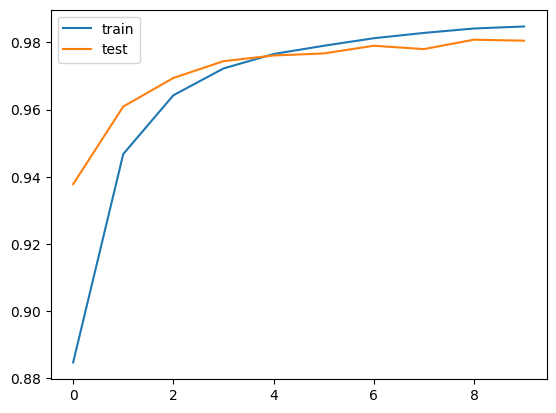

In [62]:
plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["val_accuracy"],label="test")
plt.legend()

## Another Eg: Recognising Clothes

In [63]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [64]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

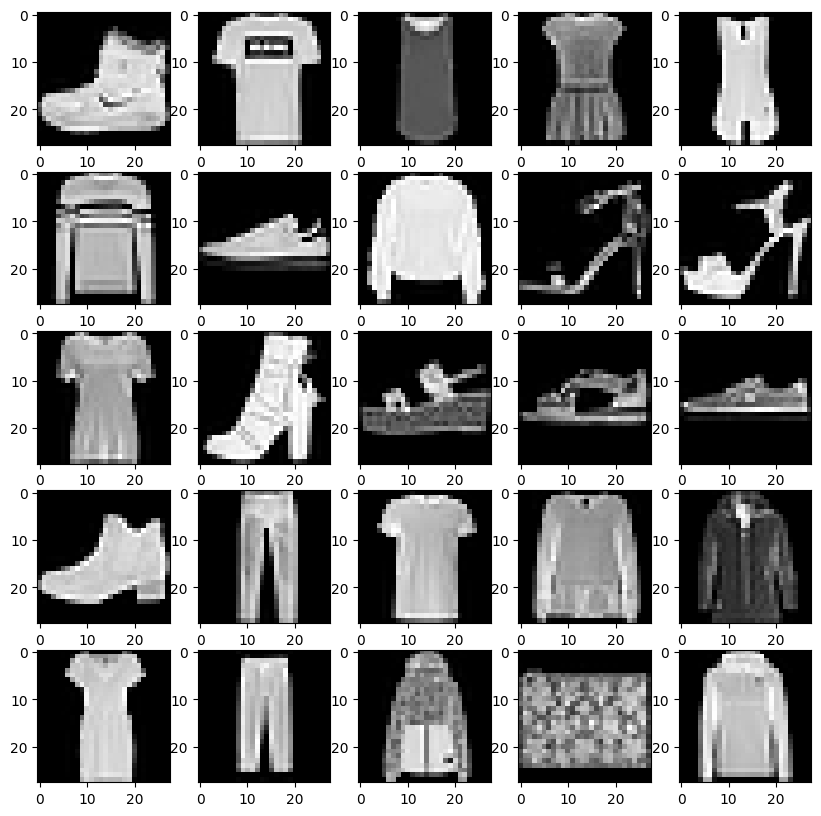

In [65]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i],cmap="gray")

In [66]:
train_images=train_images/255.0
test_images=test_images/255.0

In [67]:
# same as model.add but cleaner code
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10)
])
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']  # Put 'accuracy' inside a list
)


In [68]:
# input layer as flatten: for computer, images are just numbers. Flatten just converts the nxn matrix to a n^2 x 1 or 1 x n^2 row/column

In [69]:
model.fit(train_images,train_labels,epochs=10,verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7776 - loss: 0.6273
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8635 - loss: 0.3692
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8775 - loss: 0.3291
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8863 - loss: 0.3095
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8939 - loss: 0.2863
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9009 - loss: 0.2654
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9033 - loss: 0.2578
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9062 - loss: 0.2486
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9080 - loss: 0.2418
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9119 - loss: 0.2337


In [70]:
scores=model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8837 - loss: 0.3258


### Using CNN

In [71]:

# Define the model
model = Sequential()
model.add(InputLayer(input_shape=(28, 28)))  # Input layer
model.add(Reshape(target_shape=(28, 28, 1)))  # Reshape to (28, 28, 1) for CNN
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu'))  # Convolutional layer
model.add(MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer
model.add(Flatten())  # Flatten the output
model.add(Dense(10))  # Output layer with 10 units for 10 classes

# Compile the model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']  # Corrected to use a list for metrics
)

In [72]:
model.fit(train_images,train_labels,epochs=10,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7770 - loss: 0.6555 - val_accuracy: 0.8773 - val_loss: 0.3563
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8838 - loss: 0.3336 - val_accuracy: 0.8866 - val_loss: 0.3243
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8967 - loss: 0.2951 - val_accuracy: 0.8935 - val_loss: 0.3050
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9045 - loss: 0.2722 - val_accuracy: 0.8925 - val_loss: 0.3012
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9054 - loss: 0.2654 - val_accuracy: 0.8963 - val_loss: 0.2922
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9126 - loss: 0.2466 - val_accuracy: 0.8944 - val_loss: 0.2941
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9121 - loss: 0.2439 - val_accuracy: 0.8991 - val_loss: 0.2853
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9164 - loss: 0.2338 - 

In [73]:
scores=model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - accuracy: 0.8997 - loss: 0.2903
